# WEEK03

## 1、Supervised Learning Concepts

### 1.1 supervised learning
- Definition: 使用一组带有标签的训练数据来训练算法，从而能够对新的数据进行分类或预测
  
- Key concepts:
  * 训练数据‌：训练数据集由一系列数据点组成，每个数据点包括输入特征和相应的目标输出（标签）。
  * 特征：特征是数据的输入变量
  * 标签‌：标签是所需预测的输出或目标变量
  * 模型训练‌：在监督学习中，模型通过学习训练数据中特征与标签之间的关系来进行训练。
  * ‌预测‌：训练完成后，模型能够对未见过的数据进行预测或分类‌

- Purpose: 通过学习输入数据与输出数据之间的关系，使算法能够准确地对新数据进行分类或预测

- 监督学习的步骤
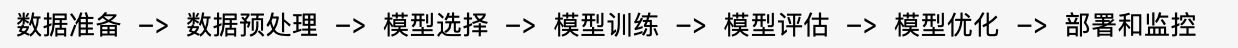

#### 1.1.1 数据准备
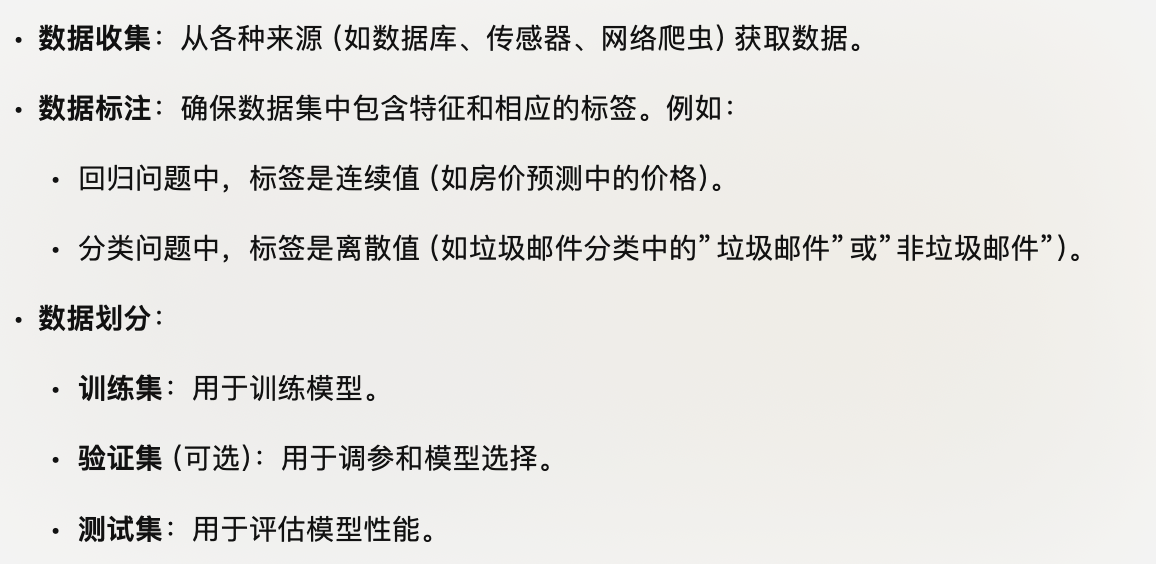

#### 1.1.2 数据预处理
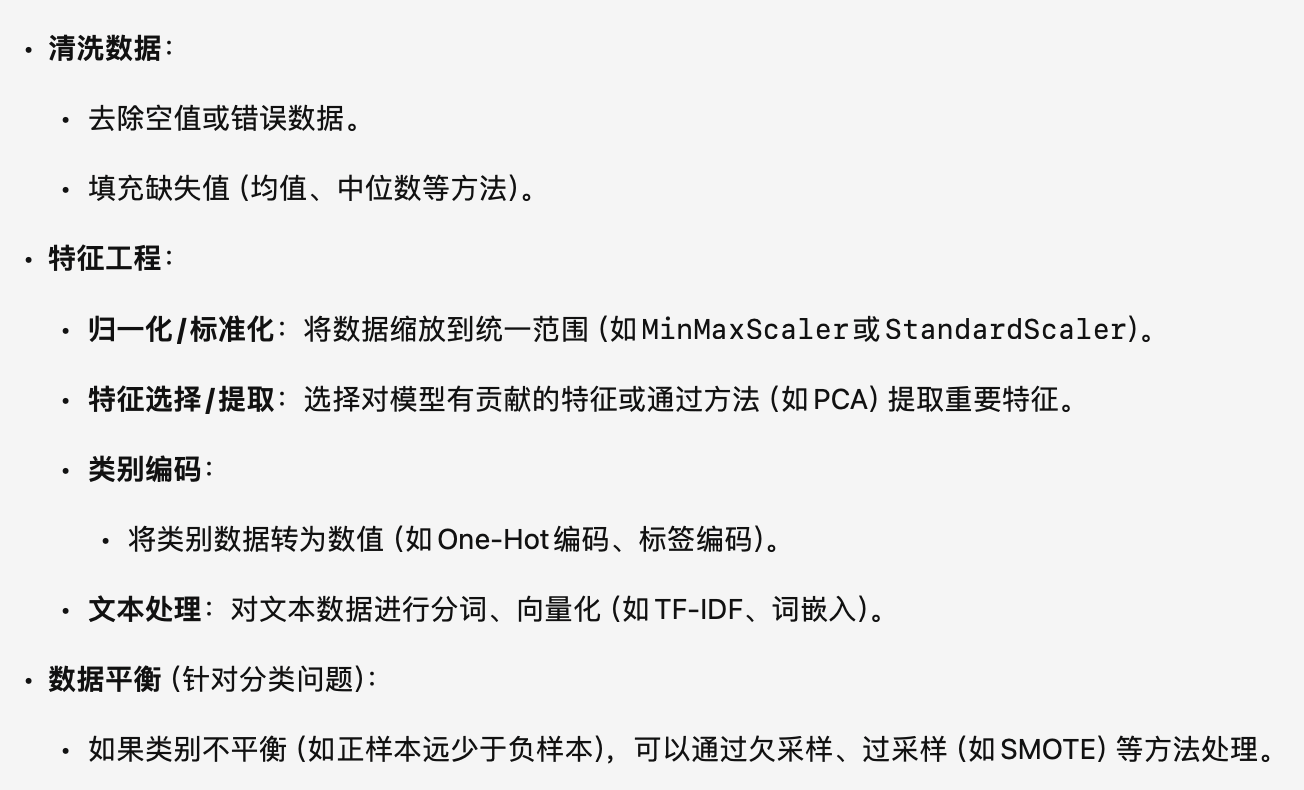

#### 1.1.3 选择模型
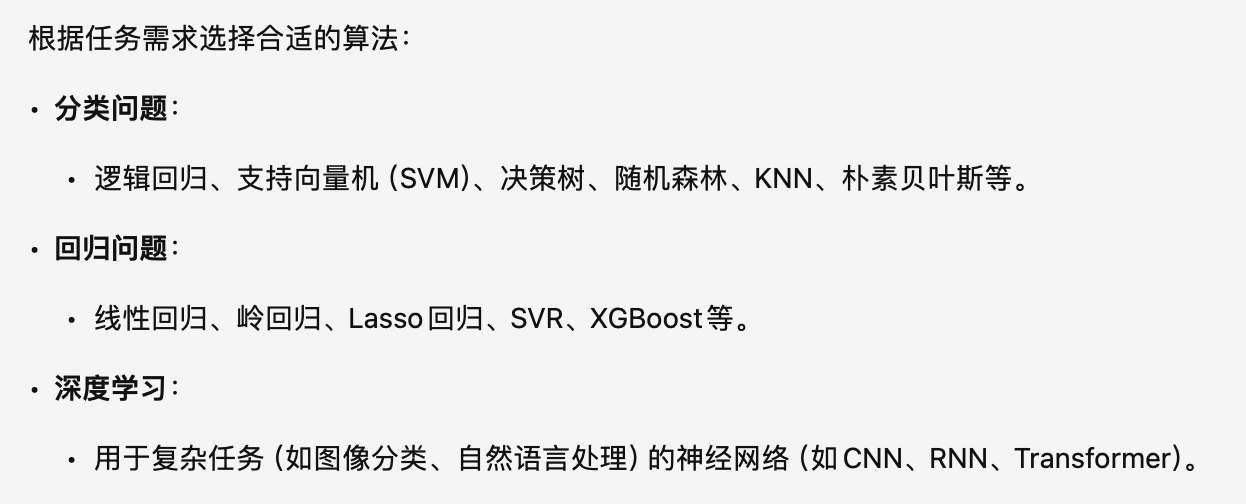

#### 1.1.4 模型训练
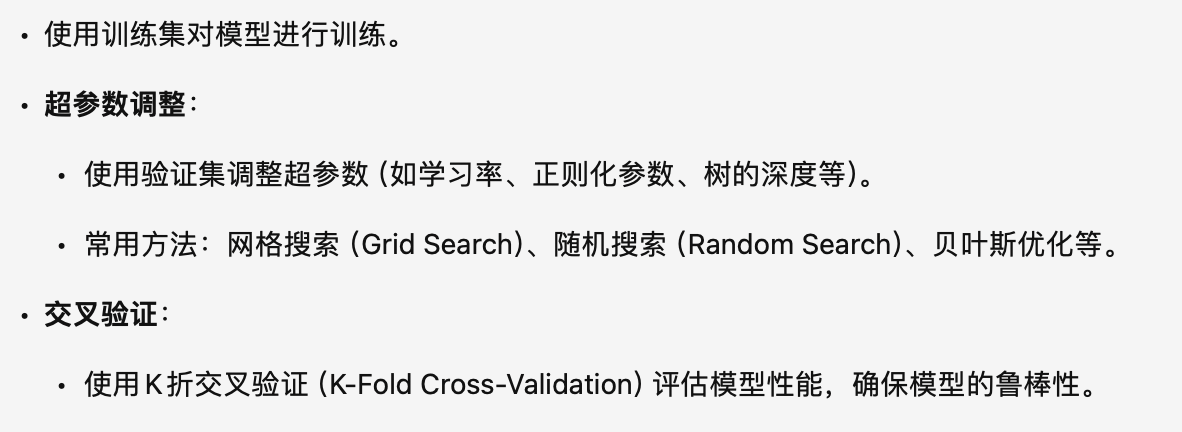

#### 1.1.5 模型评估
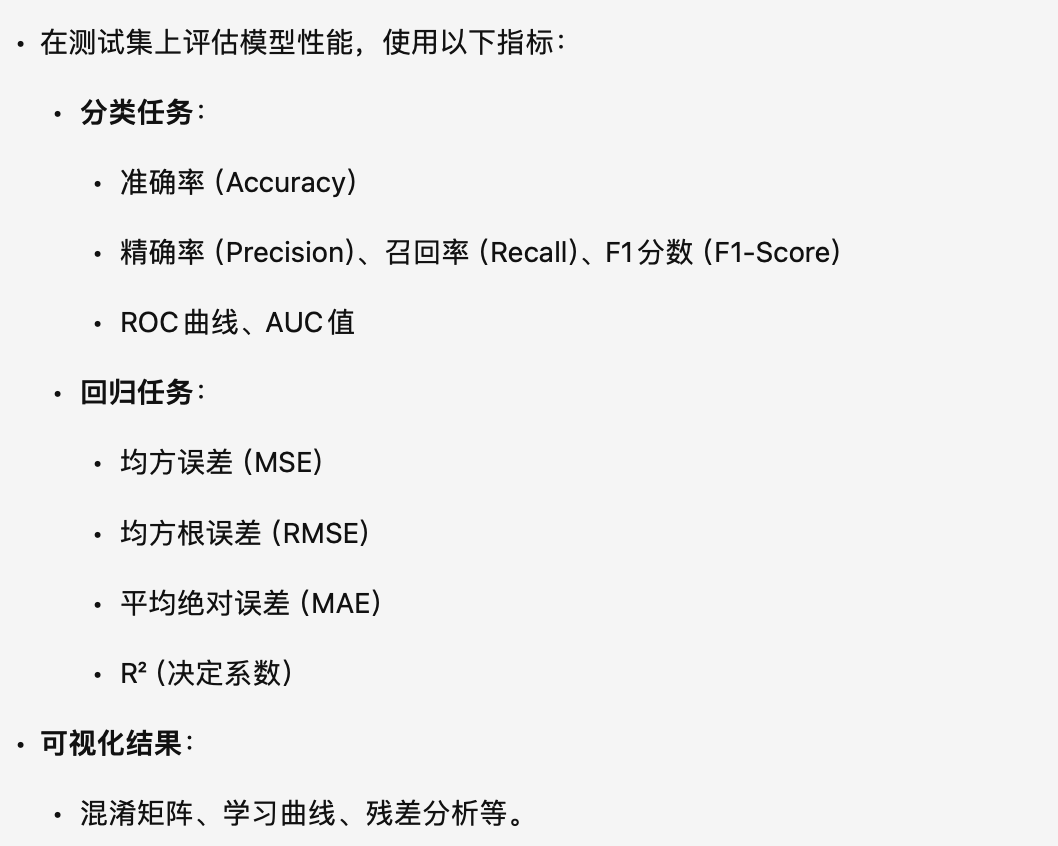

#### 1.1.6 模型优化
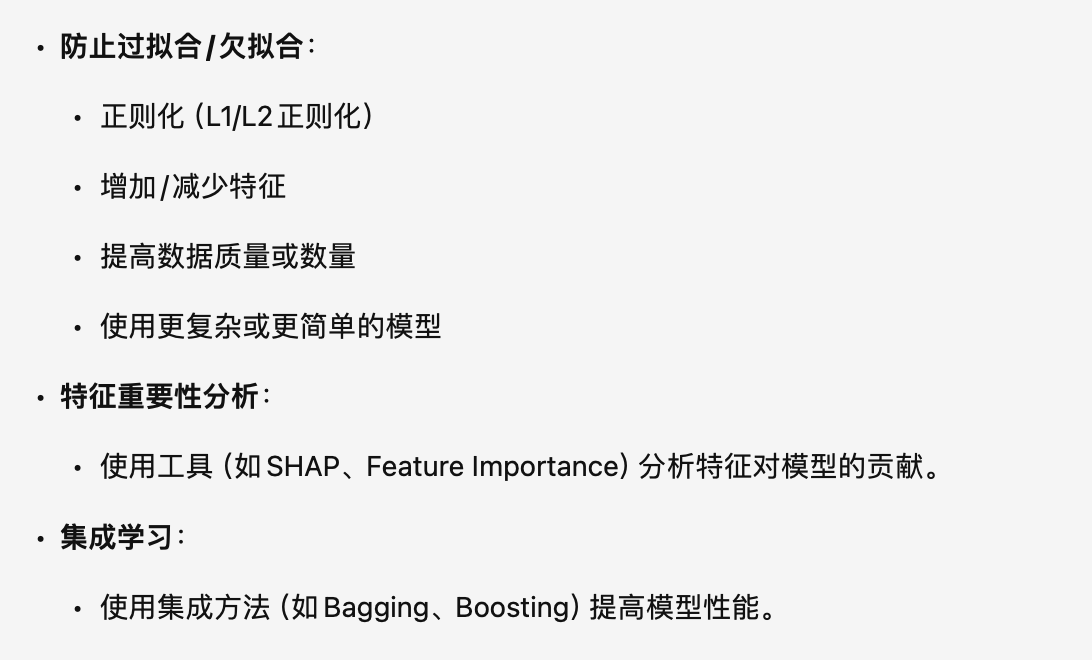

#### 1.1.7 部署和监控
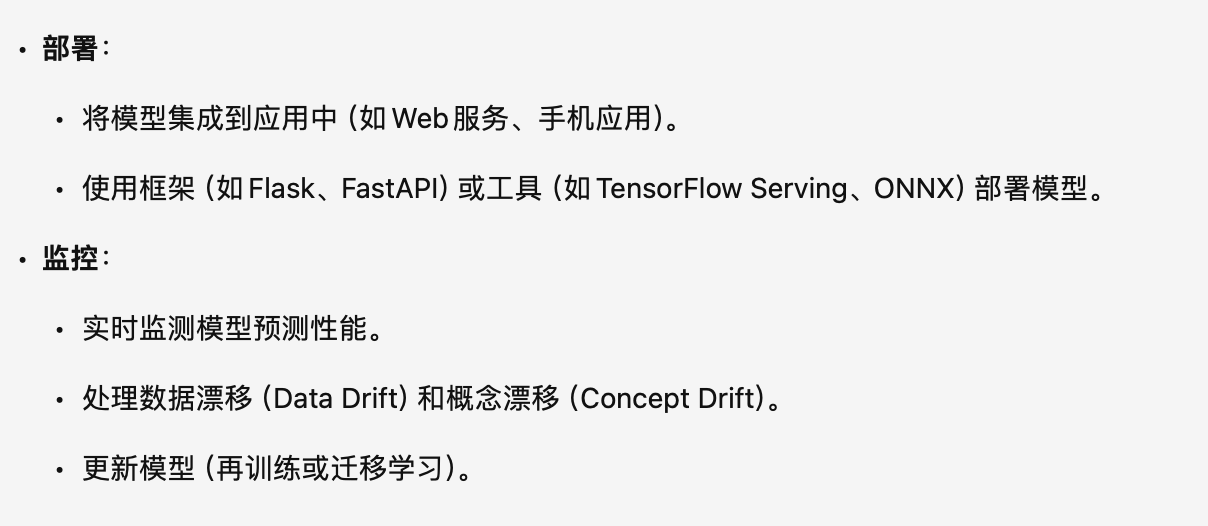

### 1.3 overfitting 过拟合

#### 1.3.1 Definition:
  是指模型在训练集上表现非常好，但在测试集或实际应用中表现较差的现象。这通常是因为模型过度拟合训练数据中的噪声或细节，导致泛化能力下降。

  （泛化能力是指学习到的模型对未知数据的预测能力）

#### 1.3.2 Effects on model performance
- 训练集表现好：训练误差很低。
- 测试集表现差：测试误差显著高于训练误差。
- 泛化能力差：模型难以正确预测未见过的数据。

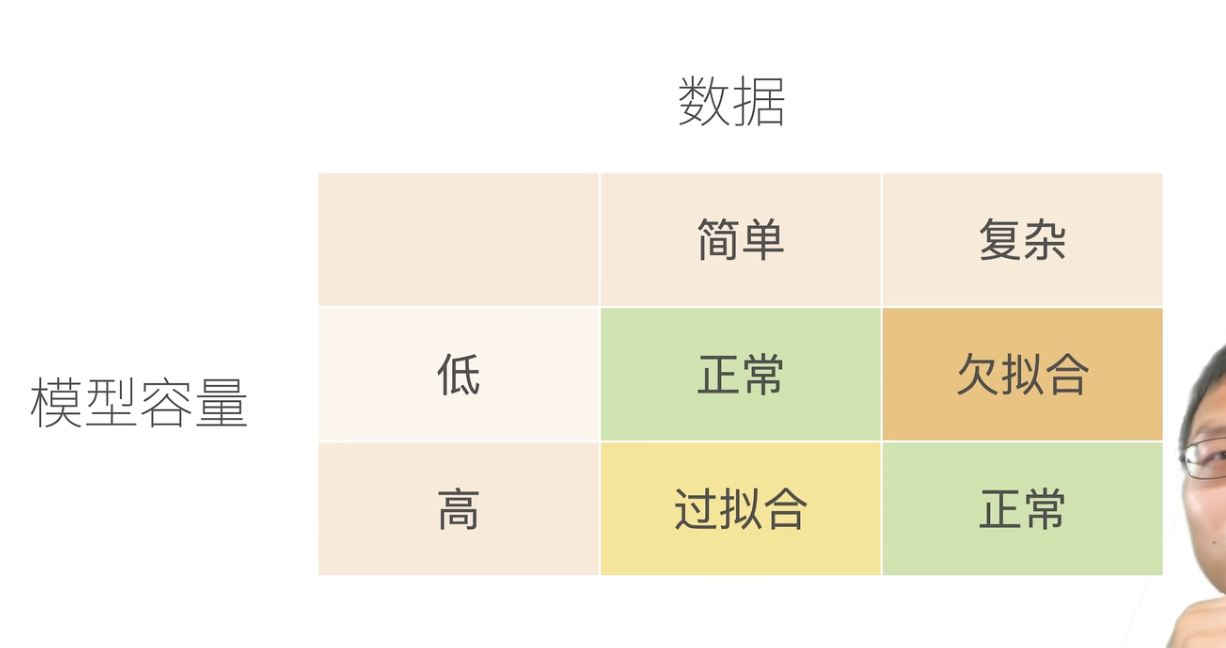

#### 1.3.3 Methods to prevent: regularization正则化

  * L1正则化（L1范数 Lasso）：权重向量的绝对值之和
	 - 通过向损失函数添加L1范数项来实现正则化，鼓励模型产生稀疏权重，即将一些特征的权重调整为0。
     - 实现特征选择和模型简化
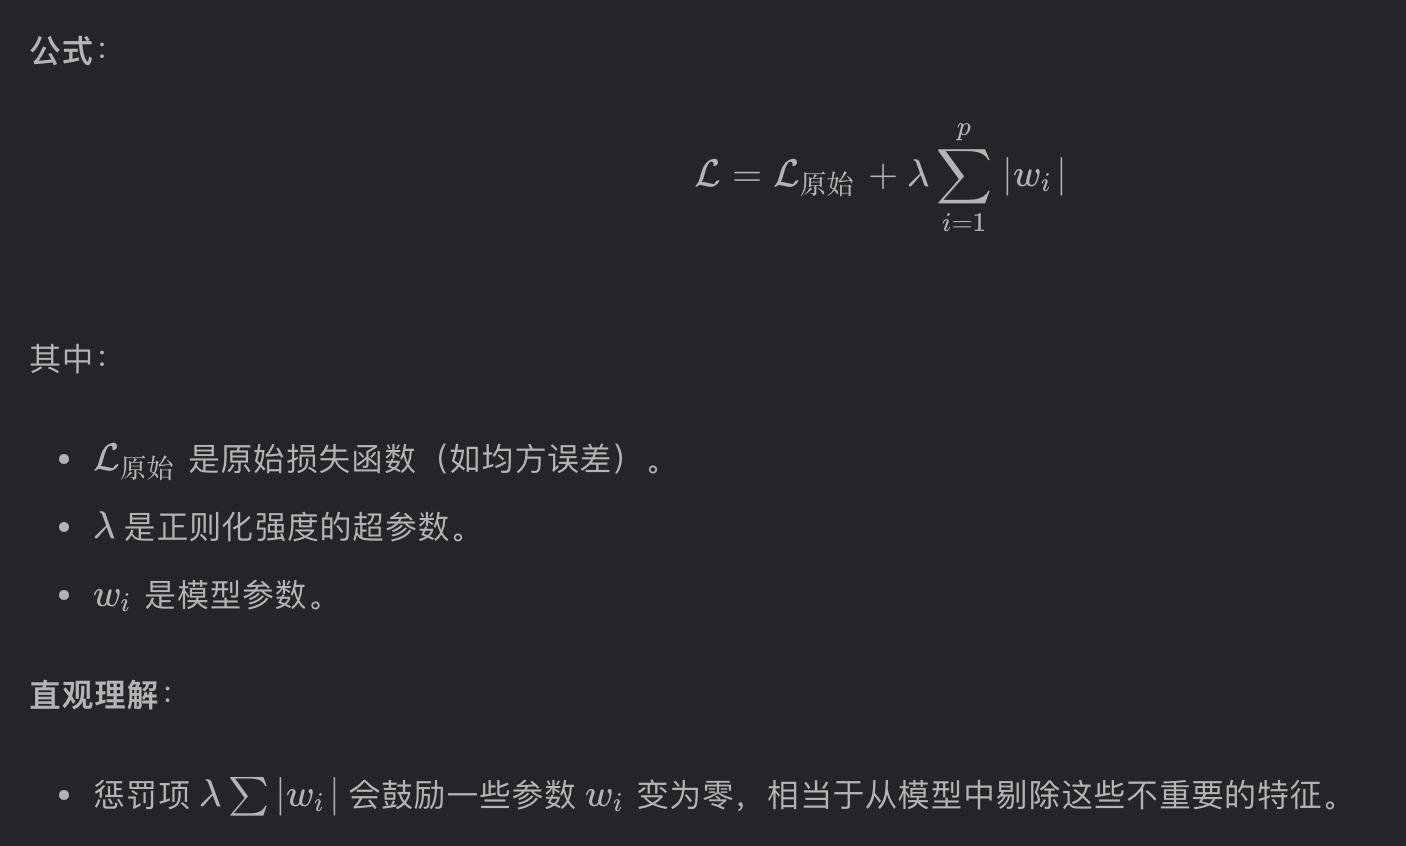

  * L2正则化（L2范数 Ridge）：权重向量的平方和
	 - 在损失函数中加入权重平方的惩罚项，防止权重值过大。
     - 它通过向损失函数添加L2范数项来实现正则化，鼓励模型产生平滑权重，即将特征的权重调整为较小的值
     - 约束模型复杂度

    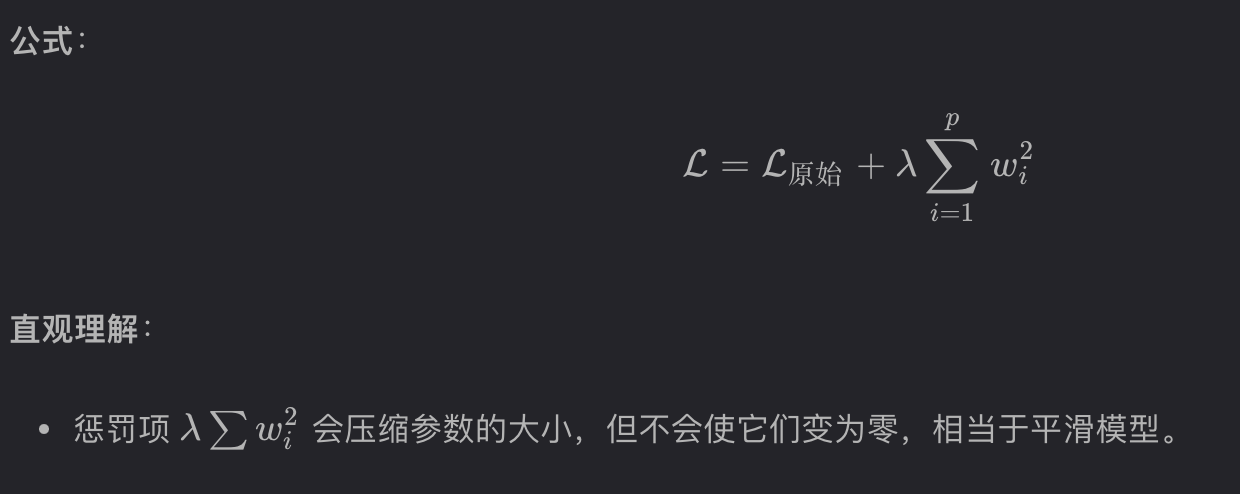

- dropout随机丢弃神经元:
  * 用于神经网络训练中，在每一轮训练中随机丢弃部分神经元，防止网络过度依赖特定节点。
  * 适用于深度学习
  * Dropout是一种在神经网络训练过程中随机“丢弃”部分神经元的正则化技术，以防止网络对特定神经元的依赖，减少过拟合。

### 1.4 Loss Function 损失函数

#### 1.4.1 Definition:
损失函数是用来评估模型预测值与真实值之间差异的函数。
- 它通过量化误差来指导模型的训练过程，帮助优化器调整模型参数。
- 损失函数的值越小，说明模型的预测结果与实际值越接近。

#### 1.4.2 different loss function:

##### 1.4.2.1 cross-entropy for classification交叉熵损失
- 衡量模型的输出概率分布和真实标签分布之间的差异
- 适用于分类

In [ ]:
import torch.nn as nn

criterion = nn.CrossEntropyLoss() #是 PyTorch 中的一个内置损失函数，用于计算交叉熵损失
loss = criterion(predicted_logits, true_labels) 
#predicted_logits 是模型的输出（未经过 softmax 的原始值，形状为 [batch_size, num_classes]）。
#true_labels 是真实类别标签（形状为 [batch_size]，每个值是类别索引，如 [0, 1, 2]）。

#CrossEntropyLoss 会先对 predicted_logits 应用 softmax 将其转化为概率分布。
#然后根据真实标签 true_labels 计算交叉熵损失。

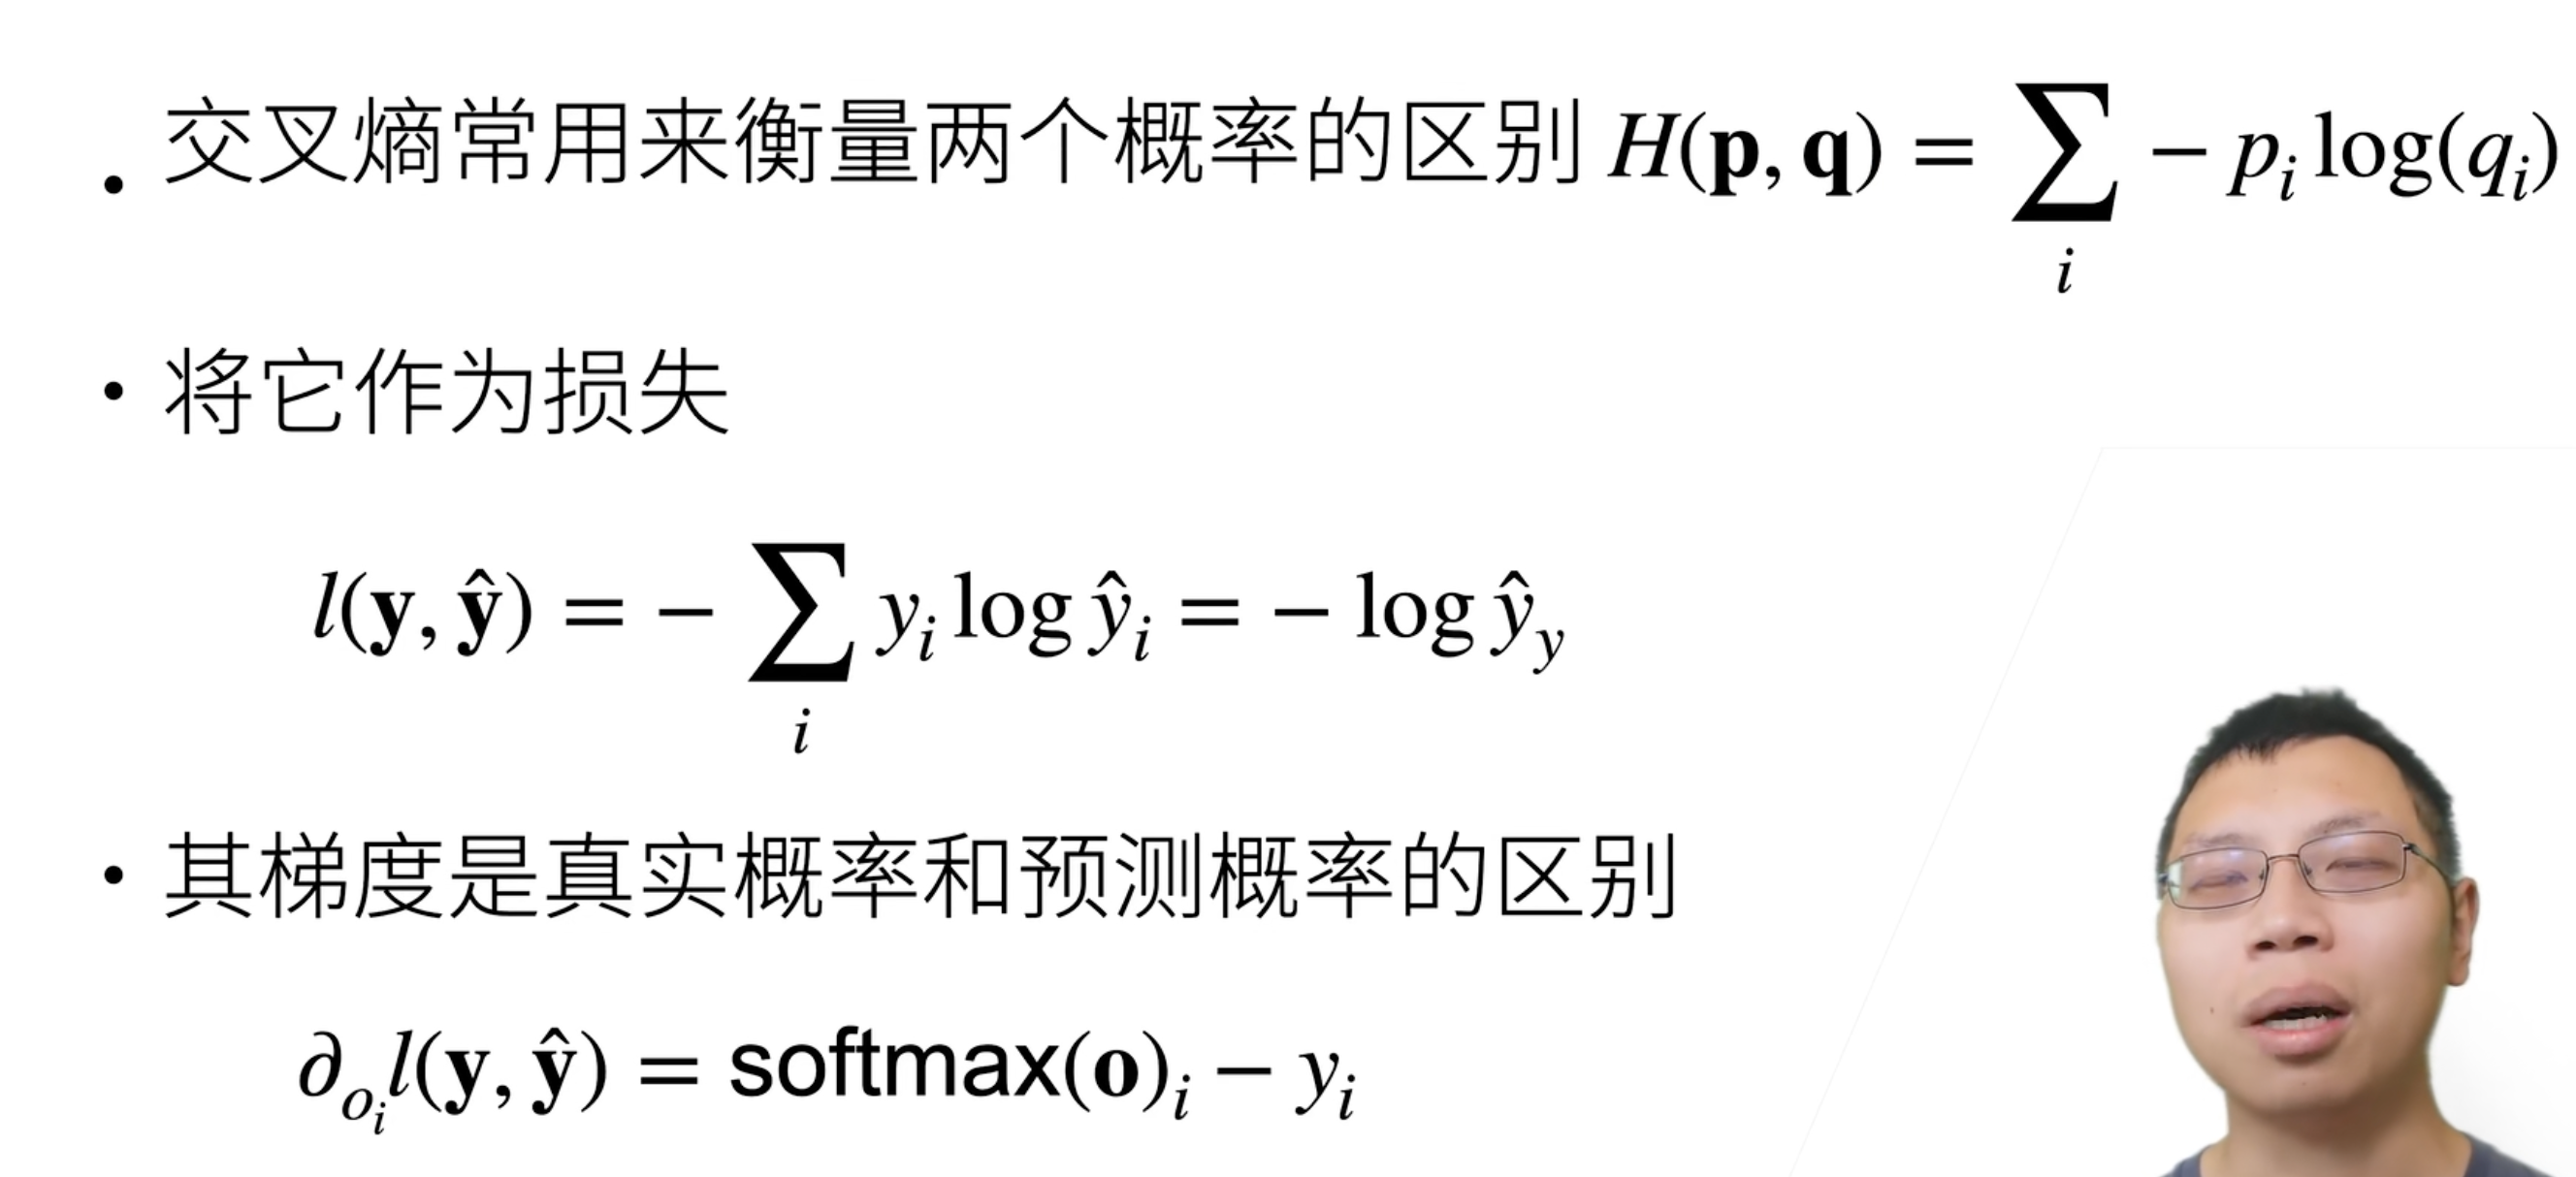

##### 1.4.2.2 mean squared error for regresstion均方误差
- 适用于回归

In [ ]:
import torch.nn as nn

criterion = nn.MSELoss()
loss = criterion(y_hat, y)

## 2、Neural Networks
_制作流程图或diagram表达神经网络里的数据流，包括每一个成分的解释

### 2.1 Neurons
- 输入：神经元接收来自其他神经元的输入信号，这些信号通常是一个或多个数值。
- 权重weight：每个输入信号都有一个对应的权重，这个权重决定了该输入信号对神经元输出的影响程度。权重可以是正数、负数或零，正数表示激活，负数表示抑制，零表示无影响。
- 偏置bais：除了输入信号和权重外，神经元还有一个偏置项。偏置是一个常数，用于调整神经元的输出，可以看作是神经元的一个固有属性。
- 激活函数：2.3

### 2.2 Layers
在神经网络中，多个神经元按照一定的方式组合在一起形成层。层的概念使得神经网络可以构建出复杂的网络结构，从而实现更强大的功能。常见的层类型包括：

- 输入层input：接收原始数据，并将数据传递给下一层。输入层中的神经元数量通常与输入数据的特征数量相同。
- 隐藏层hidden：位于输入层和输出层之间的层，用于提取数据的特征并进行复杂的计算。隐藏层可以有多层，形成深度神经网络。隐藏层中的神经元数量可以根据任务需求进行调整。
- 输出层output：产生神经网络的最终输出。输出层中的神经元数量通常与任务的目标变量数量相同。

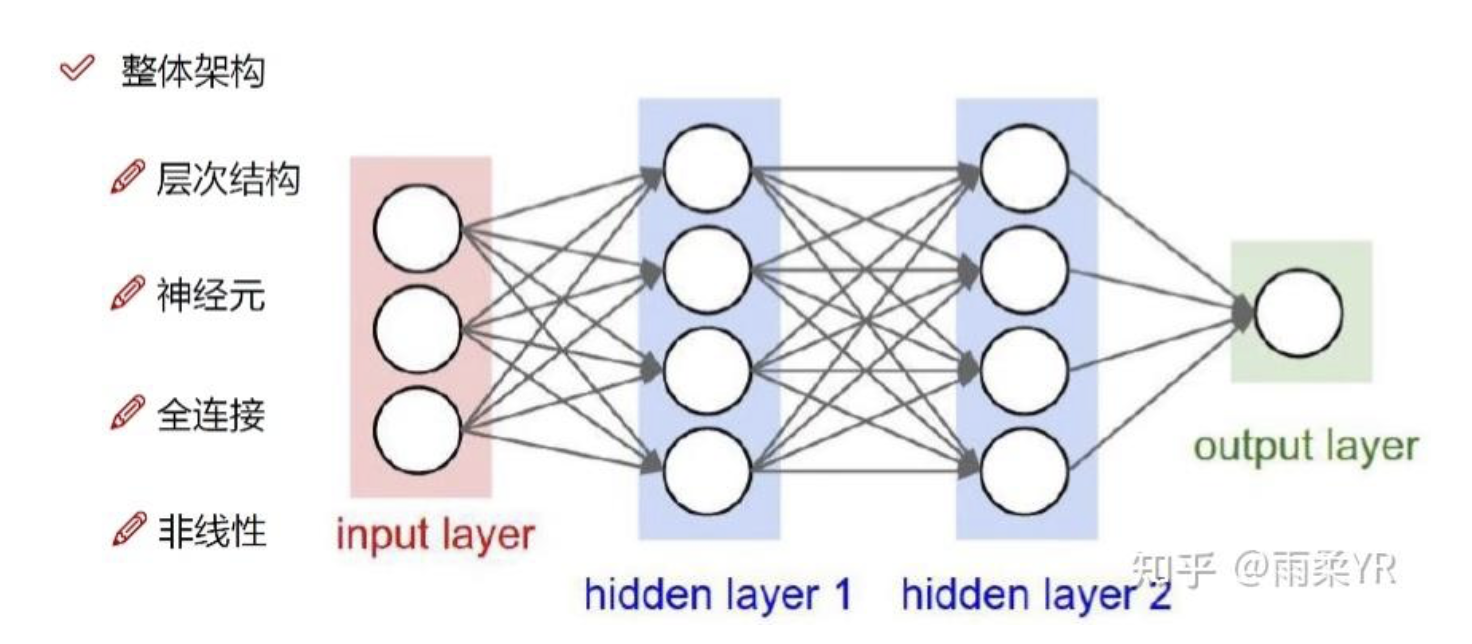

### 2.3 Activation Functions 激活函数：决定了神经元如何将其输入映射到输出
神经元的输出不是直接由输入和权重的线性组合得到的，而是通过一个激活函数进行非线性变换后得到的。
激活函数的作用是引入非线性特性，使得神经网络能够处理更复杂的问题。

- Sigmoid函数：
  * 将任意实数值映射到0到1之间，常用于二分类问题的输出层。但由于其梯度消失和计算量大等缺点，近年来在深度学习中使用较少。
- ReLU函数：
  * 当输入大于0时，输出为输入值；当输入小于或等于0时，输出为0。
  * ReLU函数在深度学习中广泛使用，因为它有助于解决梯度消失问题，并且计算量较小。
  * 但需要注意的是，ReLU函数在输入小于或等于0时会出现“死亡”现象，即梯度为0，导致神经元无法学习。为了解决这个问题，可以使用Leaky ReLU等变体函数。
- Tanh函数：
  * 将任意实数值映射到-1到1之间，类似于Sigmoid函数，但输出范围更大。Tanh函数在某些情况下可能比Sigmoid函数表现得更好，但同样存在梯度消失和计算量大等问题。

### 2.4 Backpropagation and Gradient Descent 反向传播、梯度下降

在深度学习中，神经元通过层组织起来，形成神经网络（Neural Network）。
每一层都是前一层的输出和后一层的输入，层与层之间通过权重（weights）和偏置（biases）连接
神经网络通过前向传播（Forward Propagation）来计算输出，通过反向传播（Back Propagation）来更新权重和偏置，从而学习数据中的模式
- update weights
- minimize the error

## 3、Load MNIST Dataset
ues PyTorch's torchvision.datasets to load MNIST

使用 PyTorch 的 torchvision.datasets 加载 MNIST 数据集的代码，其目的是从官方提供的数据库中获取手写数字数据集，方便后续用于训练和测试深度学习模型。MNIST 是一个经典的手写数字分类数据集，包含 0 到 9 的数字，每个图像为 28x28 的灰度图。常用于深度学习入门和模型验证。

代码的典型用途包括：
- 加载数据：自动下载 MNIST 数据集（如果本地没有）并加载到内存中。
- 预处理：可以通过数据加载器定义图像的预处理步骤，例如归一化、数据增强等。
- 分离训练和测试集：通常 MNIST 数据会分为训练集（60,000 个样本）和测试集（10,000 个样本）。
- 迭代访问：与数据加载器配合，方便将数据分批次传入模型进行训练或评估。

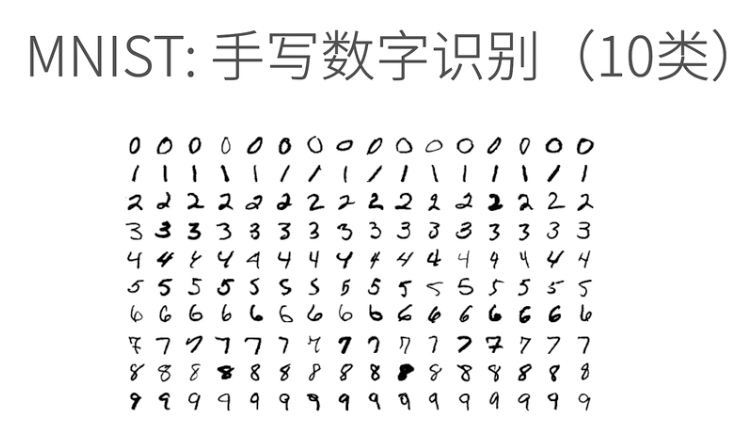

In [ ]:
import torch 
from torch import nn, optim 
from torchvision import datasets, transforms 
from torch.utils.data import DataLoader 

#定义数据预处理
transform = transforms.Compose([transforms.ToTensor(), # 将图像转换为张量
                                transforms.Normalize((0.5,), (0.5,))]) # 数据标准化

# 加载训练和测试数据集
trainset = datasets.MNIST(root='./data', train=True, download=True, transform=transform) 
#root='./data'：指定数据集存储的根目录。
#train=True：表示加载训练集。
#download=True：如果本地没有数据集，这个参数会从网上下载数据集。
#transform=transform：应用上面定义的预处理流程。

# 创建数据加载器
trainloader = DataLoader(trainset, batch_size=32, shuffle=True)
#这行代码创建了一个数据加载器DataLoader，它用于在训练过程中批量加载数据。
#trainset：传入的数据集。
#batch_size=32：每次迭代加载32个样本。
#shuffle=True：在每个epoch开始时打乱数据集，这有助于模型训练时的泛化能力。

## 4、Bulid the Model
Define a simple neural network with input, hidden, and output layers.

In [7]:
# 定义一个类 SimpleNN，继承自 torch.nn.Module,是PyTorch定义神经网络的基础类
class SimpleNN(nn.Module): 
    
    # 初始化网络结构
    def __init__(self):
        super(SimpleNN,self).__init__() #调用了父类 nn.Module 的初始化方法。
        # 使用 nn.Linear 定义全连接层：
        self.fc1 = nn.Linear(28*28,128) # 在MNIST数据集中，每个图像是28x28像素的，所以展平（flatten）后的图像有28*28=784个像素点，即784个输入特征。
        self.fc2 = nn.Linear(128,64) #从 128：这是全连接层的输出特征数量； 128 个神经元压缩到 64 个神经元
        self.fc3 = nn.Linear(64,10) #从 64 个神经元压缩到 10 个神经元（适用于 10 分类任务，例如 MNIST 数据集的数字分类任务）

    # 定义了数据如何在网络中传播，即前向传播过程
    def forward(self,x):
        x = x.view(-1,28*28) #将输入张量 x 展平为二维张量，每行有 28×28 个元素，-1 表示自动计算批量大小
        x = torch.relu(self.fc1(x)) #将数据输入到第一个全连接层 fc1，然后通过 ReLU 激活函数
        x = torch.relu(self.fc2(x)) #输出经过第二个全连接层 fc2，再通过 ReLU 激活函数。
        x = torch.log_softmax(self.fc3(x),dim=1) #输出经过第三个全连接层 fc3，计算 Log-Softmax 作为输出概率分布，用于分类任务,dim=1是计算Softmax是沿着第1列的方向
        return x

model = SimpleNN()

这段代码的功能是定义一个三层全连接神经网络，适合处理像 MNIST 这样的 10 类分类问题：
- 输入层：接收扁平化的 28×28 的图像数据。
- 隐藏层：
  * 第一层：128 个神经元 + ReLU 激活。
  * 第二层：64 个神经元 + ReLU 激活。
- 输出层：10 个神经元，用于分类任务，通过 Log-Softmax 输出每类的对数概率。

## 5、Train the Model
use cross-entropy loss and an optimizer like Adam

notebook containing the compete code,training process,and accuracy results

In [11]:
# 定义损失函数和优化器
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

# nn.CrossEntropyLoss()：定义交叉熵损失函数，用于分类问题。
# optim.Adam：使用 Adam 优化算法，学习率设置为 0.01。

In [10]:
# 设定训练轮次
epochs = 5
for e in range(epochs):
    running_loss = 0
    for images,labels in trainloader: # 从数据加载器中提取训练数据和标签
        optimizer.zero_grad() # 清零梯度
        output = model(images) # 前向传播，生成预测结果
        loss = criterion(output,labels) # 计算损失
        loss.backward() # 反向传播，计算梯度
        optimizer.step() # 更新模型参数
        running_loss += loss.item() # 累加损失
    # 每完成一个轮次的训练，打印出该轮次的平均损失，用于监控模型的训练效果。
    print(f'Epoch{e+1},Loss:{running_loss/len(trainloader)}')

Epoch1,Loss:0.42395137278437617
Epoch2,Loss:0.3238701332996289
Epoch3,Loss:0.3027179946246247
Epoch4,Loss:0.2803560016301771
Epoch5,Loss:0.26236424218416216


## 6、Experiment with Tuning Parameters

observe the effects of tuning parameters like learning rate,batch size,and activation functions

- learning rate:
- batch size:批量大小
- activation function:

analyze and document:record results for each parameter change and write a short reflection on how each affected the model
调整参数的结果和观察

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

# 定义数据预处理
transform = transforms.Compose([
    transforms.ToTensor(), # 将图像转换为张量
    transforms.Normalize((0.5,), (0.5,))]) # 数据标准化

# 加载MNIST数据集
trainset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
testset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)


# 定义一个简单的神经网络模型
class SimpleNN(nn.Module):
    def __init__(self,activation_fn=torch.relu):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 128)
        self.fc2 = nn.Linear(128,64)
        self.fc3 = nn.Linear(64,10)
        self.activation_fn = activation_fn  # 动态选择激活函数

    # 定义数据如何在网络中向前传播
    def forward(self, x):
        x = x.view(-1, 28 * 28) #将输入张量 x 展平为二维张量，每行有 28×28 个元素，-1 表示自动计算批量大小
        x = self.activation_fn(self.fc1(x))  # 将数据输入到第一个全连接层 fc1，然后通过 ReLU 激活函数
        x = self.activation_fn(self.fc2(x))  # 输出经过第二个全连接层 fc2，再通过 ReLU 激活函数。
        x = torch.log_softmax(self.fc3(x),dim=1)  # 输出经过第三个全连接层 fc3，计算 Log-Softmax 作为输出概率分布，用于分类任务,dim=1是计算Softmax是沿着第1列的方向
        return x

# 定义训练函数
def train_and_evaluate(epochs,learning_rate,batch_size,activation_fn):
    # 数据加载器
    trainloader = DataLoader(trainset,batch_size=batch_size,shuffle=True)
    testloader = DataLoader(testset,batch_size=batch_size,shuffle=False)

    # 实例化模型
    model = SimpleNN(activation_fn)
    criterion = nn.CrossEntropyLoss() # 损失函数
    optimizer = optim.Adam(model.parameters(),lr=learning_rate) # 优化器

    # 训练模型
    for epoch in range(epochs):
        model.train() #启用训练模式
        running_loss = 0
        for images,labels in trainloader:
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs,labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
        print(f'Epoch[{epoch+1}/{epochs}],Loss:{running_loss/len(trainloader):.4f}')

    # 在测试集上评估模型
    model.eval() # 关闭训练专用行为
    correct = 0
    total = 0
    with torch.no_grad(): #梯度清零
        for images,labels in testloader:
            outputs = model(images)
            _,predicted = torch.max(outputs,dim=1) #_ 是一个惯例，表示我们不会使用的变量。torch.max 返回的第一个值（最大值本身）用 _ 忽略，因为我们只需要类别索引
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    accuracy = correct / total
    print(f'Learning Rate:{learning_rate},Batch Size:{batch_size},Activation:{activation_fn.__name__},Accuracy:{accuracy:.4f}')
    return accuracy

# 测试不同超参数设置
epochs = 5
learning_rates = [0.001,0.01,0.1]
batch_sizes = [16, 32, 64]
activation_functions = [torch.relu, torch.sigmoid]

# 记录结果
results = []
for lr in learning_rates:
    for batch_size in batch_sizes:
        for activation_fn in activation_functions:
            print(f'Testing with LR: {lr}, Batch Size: {batch_size}, Activation: {activation_fn.__name__}')
            accuracy = train_and_evaluate(epochs,lr, batch_size, activation_fn)
            results.append((lr, batch_size, activation_fn.__name__, accuracy))

# 输出结果
print("\nResults:")
for lr, batch_size, activation, accuracy in results:
    print(f"LR: {lr}, Batch Size: {batch_size}, Activation: {activation}, Accuracy: {accuracy:.4f}")


Testing with LR: 0.001, Batch Size: 16, Activation: relu
Epoch[1/5],Loss:0.3312
Epoch[2/5],Loss:0.1676
Epoch[3/5],Loss:0.1303
Epoch[4/5],Loss:0.1105
Epoch[5/5],Loss:0.0975
Learning Rate:0.001,Batch Size:16,Activation:relu,Accuracy:0.9642
Testing with LR: 0.001, Batch Size: 16, Activation: sigmoid
Epoch[1/5],Loss:0.4248
Epoch[2/5],Loss:0.1775
Epoch[3/5],Loss:0.1396
Epoch[4/5],Loss:0.1197
Epoch[5/5],Loss:0.1084
Learning Rate:0.001,Batch Size:16,Activation:sigmoid,Accuracy:0.9639
Testing with LR: 0.001, Batch Size: 32, Activation: relu
Epoch[1/5],Loss:0.3549
Epoch[2/5],Loss:0.1718
Epoch[3/5],Loss:0.1313
Epoch[4/5],Loss:0.1060
Epoch[5/5],Loss:0.0942
Learning Rate:0.001,Batch Size:32,Activation:relu,Accuracy:0.9650
Testing with LR: 0.001, Batch Size: 32, Activation: sigmoid
Epoch[1/5],Loss:0.5020
Epoch[2/5],Loss:0.1856
Epoch[3/5],Loss:0.1363
Epoch[4/5],Loss:0.1125
Epoch[5/5],Loss:0.0959
Learning Rate:0.001,Batch Size:32,Activation:sigmoid,Accuracy:0.9676
Testing with LR: 0.001, Batch Size: 

MNIST 数据集中，当学习率为0.001时，模型精确度较高，批量大小和激活函数对模型精确度的影响程度较低。